<a href="https://colab.research.google.com/github/honeyd3wy/PyTorch/blob/master/n232-data-wrangling/n232a-data-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 2*

# 📝 Assignment
---
# Data Wrangling


### 1) 지속적으로 여러분의 포트폴리오 데이터를 랭글링 하세요
- 여러분이 선택한 데이터들을 랭글링하여 모델을 만들기 위한 테이블 형태의 데이터로 만들어 보세요.
- **다음 함수의 result를 완성시키고 리턴값을 과제 제출폼에 제출하세요.**

#### 제출 과제

In [1]:
### 이곳에서 제출폼 과제를 진행해 주세요 ###
import pandas as pd
df_a = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/assignments/purchase_data.csv", sep=",",index_col=0)

## 다음 result 함수 안에 male, female 변수를 계산하세요.(groupby, get_group을 사용하세요.)
## sum_male: Age = 20, Gender = "Male" 그룹의 Price를 합하세요.
## sum_female: Age = 20, Gender = "Female" 그룹의 Price를 합하세요.

def result(df):
    
    sum_male = df.groupby('Age').get_group(20).groupby('Gender').get_group('Male')['Price'].sum()
    sum_female = df.groupby('Age').get_group(20).groupby('Gender').get_group('Female')['Price'].sum()

    print("sum_male: {}, sum_female: {}".format(sum_male, sum_female))
    return round(sum_male + sum_female)

result(df_a)

sum_male: 260.2, sum_female: 43.730000000000004


304

#### 포트폴리오 데이터 랭글링

In [2]:
# 경고문 무시하기
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기
import pandas as pd

url = 'https://docs.google.com/uc?export=download&id=1OKV8Wym_meJYKfVZBW_sVHOTejjQIFj_'
df = pd.read_csv(url)

#### ***Data Description***
- `customerID` : 고객의 ID
- `gender` : 고객의 성별
- `SeniorCitizen` : 고객이 노인인지 여부 `(0, 1)`
- `Partner` : 고객에게 파트너가 있는지 여부 `(Yes, No)`
- `Dependents` : 고객에게 피 부양자가 있는지 여부 `(Yes, No)`
- `tenure` : 고객이 우리 통신사에 머문 기간(월)
- `PhoneService` : 고객이 휴대전화 서비스를 이용하는지 여부 `(Yes, No)`
- `MultipleLines` : 고객에게 여러 회선이 있는지 여부`(Yes, No, No phone service)`
- `InternetService` : 고객의 인터넷 서비스 공급자`(DSL, Fiber optic(광섬유), No)`
- `OnlineSecurity` : 고객의 온라인 보안 여부`(Yes, No, No internet service)`
- `OnlineBackup`: 고객의 온라인 백업 여부`(Yes, No, No internet service)`
- `DeviceProtection` : 고객에게 장치 보호 기능이 있는지 여부`(Yes, No, No internet service)`
- `TechSupport` : 고객에게 기술 지원이 있는지 여부`(Yes, No, No internet service)`
- `StreamingTV` : 고객에게 스트리밍 TV가 있는지 여부`(Yes, No, No internet service)`
- `StreamingMovies` : 고객에게 스트리밍 영화가 있는지 여부`(Yes, No, No internet service)`
- `Contract` : 고객의 계약 기간`(Month-to-month, One year, Two year)`
- `PaperlessBilling` : 고객이 종이 없는 청구서를 가지고 있는지 여부`(Yes, No)`
- `PaymentMethod` : 고객의 결제 방법

        (Electronic check(전자 수표), Mailed check(우편 수표),
        Bank transfer (automatic)(은행 송금(자동)), Credit card (automatic)(신용카드(자동)))

- `MonthlyCharges` : 고객에게 매월 청구된 금액
- `TotalCharges` : 고객에게 청구된 총 금액
- `Churn` : 고객의 이탈 여부`(Yes or No)`

##### 데이터 전처리

In [4]:
import numpy as np

df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df.drop('customerID', axis=1, inplace=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [6]:
nulls_id = df[df['TotalCharges'].isnull()].index.tolist()

# null값은 신규 고객으로 보이므로 월 납부요금으로 결측치를 채워준다.
df.loc[df.index.isin(nulls_id), 'TotalCharges'] = df.loc[df.index.isin(nulls_id), 'MonthlyCharges']

In [7]:
df[df.index.isin(nulls_id)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35,0


In [8]:
## 타겟, 특성 나누기
target = 'Churn'
features = df.columns.tolist()
features.remove(target)
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = list(set(features).difference(num_features))

In [9]:
type(cat_features)

list

##### EDA

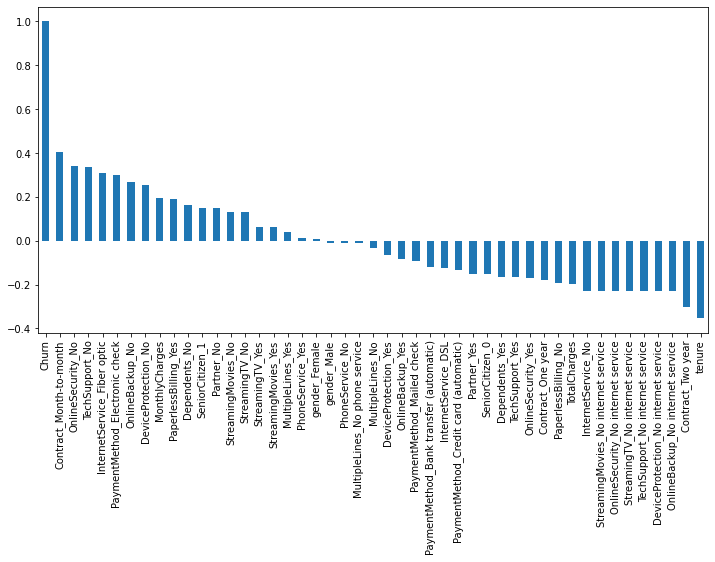

In [10]:
# target과 feature들의 상관관계 파악하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
(pd.get_dummies(df).corr()['Churn']).sort_values(ascending=False).plot(kind='bar');

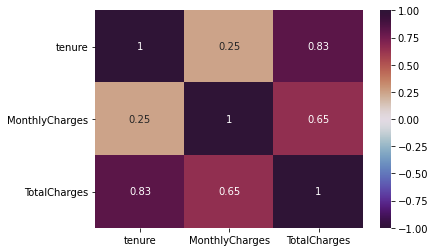

In [11]:
# numeric feature간의 상관관계 파악하기
import seaborn as sns

ax = sns.heatmap(df[num_features].corr(), cmap='twilight_shifted', vmin=-1, vmax=1, annot=True)

`tenure`과 `TotalCharges`의 상관관계는 0.83, `MonthlyCharges`와 `TotalCharges`의 상관관계는 0.65로 상관관계가 있다고 할 수 있으나 0.85가 넘지 않으므로 둘 다 삭제하지 않는다.

##### 데이터 랭글링
: 데이터 셋을 나누지 않고 전체 데이터로 의미를 도출한다.

1. `Contract`

In [12]:
chrun_to_contract = df.groupby(['Churn', 'Contract']).count()
chrun_to_contract= chrun_to_contract.mean(axis=1).reset_index().rename(columns={0:'Counts'}).pivot_table(index='Contract', columns='Churn', values = 'Counts')
chrun_to_contract['Ratio(%)'] = (chrun_to_contract[1] / (chrun_to_contract[0]+chrun_to_contract[1]))*100
chrun_to_contract

Churn,0,1,Ratio(%)
Contract,,,
Month-to-month,2220.0,1655.0,42.709677
One year,1307.0,166.0,11.269518
Two year,1647.0,48.0,2.831858


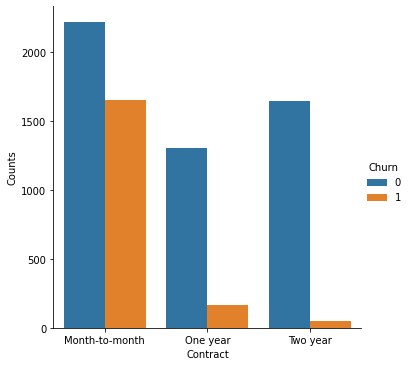

In [13]:
import seaborn as sns
sns.catplot(data=df.groupby(['Churn', 'Contract']).count().mean(axis=1).reset_index().rename(columns={0:'Counts'}), kind='bar',
            x='Contract', y='Counts', hue='Churn');
plt.show()

`Month-to-Month`로 계약한 사람들이 가장 많고, 해지율도 매우 높은 편이다.

> 단기 고객을 붙잡아 둘 프로모션 필요

2. `InternetService`

In [14]:
chrun_to_internet = df.groupby(['Churn', 'InternetService']).count()
chrun_to_internet = chrun_to_internet.mean(axis=1).reset_index().rename(columns={0:'Counts'}).pivot_table(index='InternetService', columns='Churn', values='Counts')
chrun_to_internet['Ratio(%)'] = (chrun_to_internet[1] / (chrun_to_internet[0]+chrun_to_internet[1]))*100
chrun_to_internet

Churn,0,1,Ratio(%)
InternetService,,,
DSL,1962.0,459.0,18.959108
Fiber optic,1799.0,1297.0,41.892765
No,1413.0,113.0,7.404980


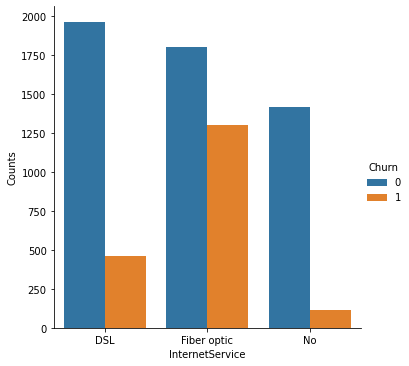

In [15]:
sns.catplot(data=df.groupby(['Churn', 'InternetService']).count().mean(axis=1).reset_index().rename(columns={0:'Counts'}), kind='bar',
            x='InternetService', y='Counts', hue='Churn');
plt.show()

`Fiber optic` 이용 고객의 해지율이 매우 높다.

> 광섬유 회선에 문제가 없는지 점검할 필요

3. `PaymentMethod`

In [16]:
chrun_to_paymentmethod = df.groupby(['Churn', 'PaymentMethod']).count()
chrun_to_paymentmethod = chrun_to_paymentmethod.mean(axis=1).reset_index().rename(columns={0:'Counts'}).pivot_table(index='PaymentMethod', columns='Churn', values='Counts')
chrun_to_paymentmethod['Ratio(%)'] = (chrun_to_paymentmethod[1] / (chrun_to_paymentmethod[0]+chrun_to_paymentmethod[1]))*100
chrun_to_paymentmethod

Churn,0,1,Ratio(%)
PaymentMethod,,,
Bank transfer (automatic),1286.0,258.0,16.709845
Credit card (automatic),1290.0,232.0,15.243101
Electronic check,1294.0,1071.0,45.285412
Mailed check,1304.0,308.0,19.106700


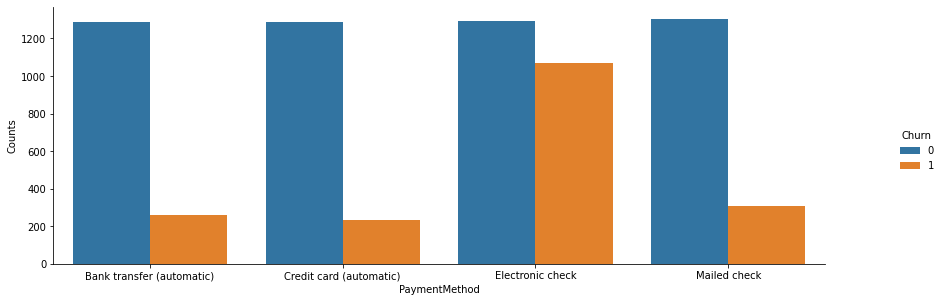

In [17]:
d = df.groupby(['Churn', 'PaymentMethod']).count().mean(axis=1).reset_index().rename(columns={0:'Counts'})

ax = sns.catplot(data=d,
            x='PaymentMethod', y='Counts', hue='Churn', kind='bar')
plt.gcf().set_size_inches(14, 4)

전자 결제 이용자들의 해지율이 너무 높다.

> 전자 결제에 문제가 있는지 확인 필요

4. `Dependents`

In [18]:
chrun_to_dependents = df.groupby(['Churn', 'Dependents']).count()
chrun_to_dependents = chrun_to_dependents.mean(axis=1).reset_index().rename(columns={0:'Counts'}).pivot_table(index='Dependents', columns='Churn', values='Counts')
chrun_to_dependents['Ratio(%)'] = (chrun_to_dependents[1] / (chrun_to_dependents[0]+chrun_to_dependents[1]))*100
chrun_to_dependents

Churn,0,1,Ratio(%)
Dependents,,,
No,3390.0,1543.0,31.279140
Yes,1784.0,326.0,15.450237


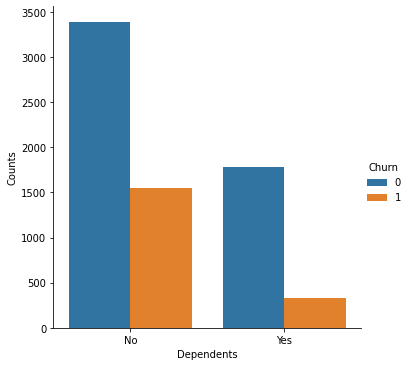

In [19]:
sns.catplot(data=df.groupby(['Churn', 'Dependents']).count().mean(axis=1).reset_index().rename(columns={0:'Counts'}), kind='bar',
            x='Dependents', y='Counts', hue='Churn');
plt.show()

5. `SeniorCitizen`

In [20]:
chrun_to_seniorcitizen = df.groupby(['Churn', 'SeniorCitizen']).count()
chrun_to_seniorcitizen = chrun_to_seniorcitizen.mean(axis=1).reset_index().rename(columns={0:'Counts'}).pivot_table(index='SeniorCitizen', columns='Churn', values='Counts')
chrun_to_seniorcitizen['Ratio(%)'] = (chrun_to_seniorcitizen[1] / (chrun_to_seniorcitizen[0]+chrun_to_seniorcitizen[1]))*100
chrun_to_seniorcitizen

Churn,0,1,Ratio(%)
SeniorCitizen,,,
0,4508.0,1393.0,23.606168
1,666.0,476.0,41.681261


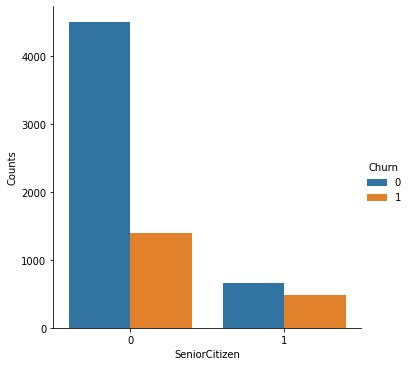

In [21]:
sns.catplot(data=df.groupby(['Churn', 'SeniorCitizen']).count().mean(axis=1).reset_index().rename(columns={0:'Counts'}), kind='bar',
            x='SeniorCitizen', y='Counts', hue='Churn');
plt.show()

노인 계층의 해지율이 매우 높다.
> 노인을 위한 서비스 유무, 결제 등 기본적인 시스템을 이용하는데 불편함이 없는지 등 점검 필요

6. `gender`

In [22]:
chrun_to_gender = df.groupby(['Churn', 'gender']).count()
chrun_to_gender = chrun_to_gender.mean(axis=1).reset_index().rename(columns={0:'Counts'}).pivot_table(index='gender', columns='Churn', values='Counts')
chrun_to_gender['Ratio(%)'] = (chrun_to_gender[1] / (chrun_to_gender[0]+chrun_to_gender[1]))*100
chrun_to_gender

Churn,0,1,Ratio(%)
gender,,,
Female,2549.0,939.0,26.920872
Male,2625.0,930.0,26.160338


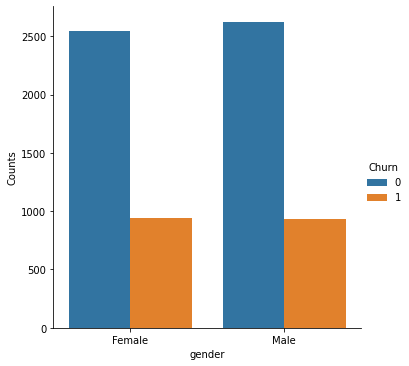

In [23]:
sns.catplot(data=df.groupby(['Churn', 'gender']).count().mean(axis=1).reset_index().rename(columns={0:'Counts'}), kind='bar',
            x='gender', y='Counts', hue='Churn');
plt.show()

해지율에 성별은 영향이 없다.

### 2) 새로 특징들을 만들어 보세요
- 여러분이 선택한 데이터에서 특징 공학을 수행해 보세요.
- **(다중선택) purchase_data를 랭글링하여 다음 조건을 계산하고 결과가 올바른 항목만 과제 제출폼에 제출하세요.**
    1. 나이 1-20세 그룹(20세 포함)의 평균 Price는 3.101818이다.
    2. 나이 21-50세 그룹의 평균 Price는 3.021559이다.
    3. 가장 많이 구입한 아이템의 ID는 178 이다.
    4. 두번째로 매출을 많이 낸 아이템 ID는 145이다.

#### 제출 과제

In [24]:
df_a

,SN,Age,Gender,Item ID,Item Name,Price
Purchase ID,,,,,,
0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,Ithergue48,24,Male,92,Final Critic,4.88
3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...
775,Aethedru70,21,Female,60,Wolf,3.54
776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46


In [25]:
### 이곳에서 제출폼 과제를 진행해 주세요 ###
# 그룹별 Price 평균
g1 = df_a[df_a['Age'] <= 20]
averageP_g1 = g1['Price'].mean()

print('1번:', averageP_g1)

g2 = df_a[(df_a['Age'] > 20) & (df_a['Age'] <= 50)]
averageP_g2 = g2['Price'].mean()

print('2번:', averageP_g2)


# 판매수 상위 Item ID
top_count_list = df_a['Item ID'].value_counts().sort_values(ascending=False).index.tolist()
best_count_ID = top_count_list[0]

print('3번:', best_count_ID)


# 매출 상위 Item IDs
top_sales_list = df_a.groupby('Item ID').sum().sort_values(by='Price', ascending=False).index.tolist()
second_top_ID = top_sales_list[1]

print('4번:', second_top_ID)


1번: 3.101818181818184
2번: 3.0215587044534415
3번: 178
4번: 82


- 답: 1, 2, 3

#### 포트폴리오 데이터 특성 공학

1. `tenure`, `MonthlyCharges`로 등급 나누기



In [26]:
# MinMaxScaler
# scaler 참고 : https://mkjjo.github.io/python/2019/01/10/scaler.html
from sklearn.preprocessing import MinMaxScaler
sclr = MinMaxScaler(feature_range=(1,10))
sclr.fit(df[['tenure', 'MonthlyCharges']])
df[['tenure_scld', 'MonthlyCharges_scld']] = sclr.transform(df[['tenure', 'MonthlyCharges']])

In [27]:
df[['tenure','tenure_scld', 'MonthlyCharges', 'MonthlyCharges_scld']]

,tenure,tenure_scld,MonthlyCharges,MonthlyCharges_scld
0,1,1.125,29.85,2.038806
1,34,5.250,56.95,4.465672
2,2,1.250,53.85,4.188060
3,45,6.625,42.30,3.153731
4,2,1.250,70.70,5.697015
...,...,...,...,...
7038,24,4.000,84.80,6.959701
7039,72,10.000,103.20,8.607463
7040,11,2.375,29.60,2.016418
7041,4,1.500,74.40,6.028358


In [28]:
df[['tenure','tenure_scld', 'MonthlyCharges', 'MonthlyCharges_scld']].describe()

,tenure,tenure_scld,MonthlyCharges,MonthlyCharges_scld
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,5.046394,64.761692,5.165226
std,24.559481,3.069935,30.090047,2.694631
min,0.000000,1.000000,18.250000,1.000000
25%,9.000000,2.125000,35.500000,2.544776
50%,29.000000,4.625000,70.350000,5.665672
75%,55.000000,7.875000,89.850000,7.411940
max,72.000000,10.000000,118.750000,10.000000


In [29]:
# EDA의 상관관계에서 tenure과 MonthlyCharges의 비율이 약 3:2이므로 이를 반영하여 점수를 계산한다
df['s_score'] = 0.6 * df['tenure_scld'] + 0.4 * df['MonthlyCharges_scld']

In [30]:
df['s_score'].describe()

count    7043.000000
mean        5.093927
std         2.353493
min         1.051940
25%         3.217537
50%         4.876716
75%         6.934627
max        10.000000
Name: s_score, dtype: float64

In [31]:
# 전체 데이터를 5등분해 등급을 나눈다
df['s_grade'] = pd.qcut(df['s_score'], 5, labels=['E', 'D', 'C', 'B', 'A'])

In [32]:
chrun_to_sgrade = df.groupby(['Churn', 's_grade']).count()
chrun_to_sgrade= chrun_to_sgrade.mean(axis=1).reset_index().rename(columns={0:'Counts'}).pivot_table(index='s_grade', columns='Churn', values = 'Counts')
chrun_to_sgrade['Ratio(%)'] = (chrun_to_sgrade[1] / (chrun_to_sgrade[0]+chrun_to_sgrade[1]))*100
chrun_to_sgrade.sort_values('Ratio(%)', ascending=False)

Churn,0,1,Ratio(%)
s_grade,,,
D,812.0,594.0,42.247511
E,994.0,417.0,29.553508
C,995.0,414.0,29.382541
B,1143.0,265.0,18.821023
A,1230.0,179.0,12.704045


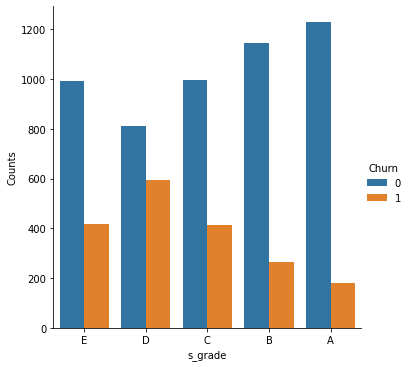

In [33]:
import seaborn as sns
sns.catplot(data=df.groupby(['Churn', 's_grade']).count().mean(axis=1).reset_index().rename(columns={0:'Counts'}), kind='bar',
            x='s_grade', y='Counts', hue='Churn');
plt.show()

In [34]:
# 신규 고객인지 아닌지에 대한 feature 추가
df['NewCustomer'] = (df['tenure'] == 0).astype(int)

In [35]:
# 필요 없는 칼럼 없애기
df.drop(['tenure_scld', 'MonthlyCharges_scld', 'tenure', 'MonthlyCharges', 's_score'], axis=1, inplace=True)

## 🔥 도전과제

### 3) 조금 부족하더라도 최소한의 랭글링으로 데이터를 준비하여 간단한 모델을 학습시켜 보세요
- 여러분들이 선택한 데이터를 가지고 간단한 모델을 학습하고 결과를 리포팅 합니다.

In [36]:
# wrangling 과정을 거친 데이터셋 
df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,s_grade,NewCustomer
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0,E,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.50,0,C,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,1,E,0
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,0,C,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,1,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.50,0,C,0
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.90,0,A,0
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,0,E,0
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.60,1,D,0


In [37]:
# 데이터 분할과 인코딩을 위해 변수 유형 분류

    # target
target = 'Churn'

    # feature
features = df.columns.tolist()
features.remove(target)

    # 연속형 변수
numeric_features = ['TotalCharges']

    # 이진 변수
binary_features = [col for col in df.columns if df[col].nunique() == 2]
binary_features.remove(target)

    # 이진 변수가 아닌 범주형 변수
multicat_features = list(set(features).difference(numeric_features).difference(binary_features))

In [38]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=10)

In [ ]:
! pip install category_encoders
! pip install --upgrade git+https://github.com/scikit-learn-contrib/category_encoders

In [40]:
# 랜덤 포레스트 모델링
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipe_rf = make_pipeline(
    OrdinalEncoder(cols=binary_features),
    OneHotEncoder(cols=multicat_features),
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_rf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['gender', 'SeniorCitizen', 'Partner',
                                      'Dependents', 'PhoneService',
                                      'PaperlessBilling', 'NewCustomer'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'gender',
                                          'data_type': dtype('O'),
                                          'mapping': Male      1
Female    2
NaN      -2
dtype: int64},
                                         {'col': 'SeniorCitizen',
                                          'data_ty...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                

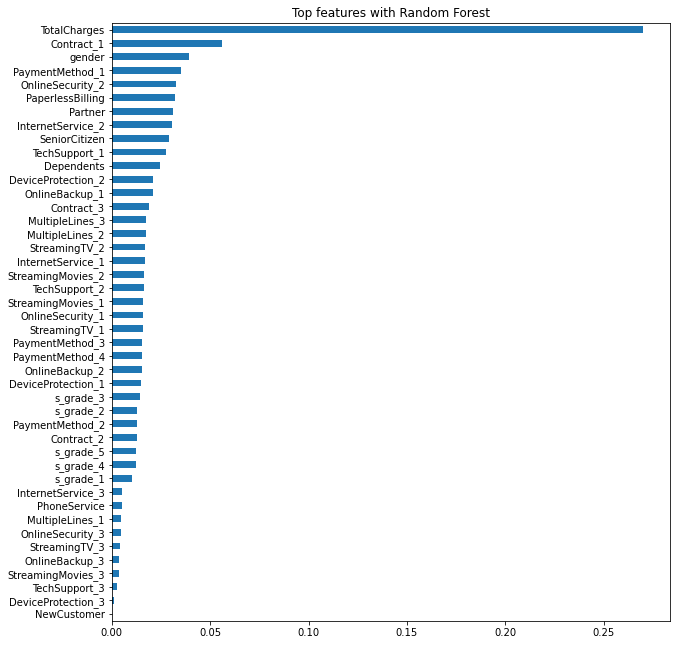

In [41]:
# feature importance

enc = pipe_rf.named_steps['onehotencoder']
encoded_columns = enc.get_feature_names()

import matplotlib.pyplot as plt

importances = pd.Series(pipe_rf.steps[2][1].feature_importances_, encoded_columns)
n = len(encoded_columns)
plt.figure(figsize=(10,n/4))
plt.title(f'Top features with Random Forest')
importances.sort_values()[-n:].plot.barh();

In [42]:
from sklearn.model_selection import cross_val_score

k = 5
scores = cross_val_score(pipe_rf, X_train, y_train, cv=k, 
                         scoring='recall')

print(f'recall for {k} folds:', scores)

recall for 5 folds: [0.48196721 0.46229508 0.49836066 0.44444444 0.53770492]


In [43]:
from sklearn.metrics import classification_report
y_pred_test = pipe_rf.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1066
           1       0.57      0.49      0.53       343

    accuracy                           0.79      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.78      0.79      0.78      1409



In [44]:
sorted(pipe_rf.get_params().keys())

['memory',
 'onehotencoder',
 'onehotencoder__cols',
 'onehotencoder__drop_invariant',
 'onehotencoder__handle_missing',
 'onehotencoder__handle_unknown',
 'onehotencoder__return_df',
 'onehotencoder__use_cat_names',
 'onehotencoder__verbose',
 'ordinalencoder',
 'ordinalencoder__cols',
 'ordinalencoder__drop_invariant',
 'ordinalencoder__handle_missing',
 'ordinalencoder__handle_unknown',
 'ordinalencoder__mapping',
 'ordinalencoder__return_df',
 'ordinalencoder__verbose',
 'randomforestclassifier',
 'randomforestclassifier__bootstrap',
 'randomforestclassifier__ccp_alpha',
 'randomforestclassifier__class_weight',
 'randomforestclassifier__criterion',
 'randomforestclassifier__max_depth',
 'randomforestclassifier__max_features',
 'randomforestclassifier__max_leaf_nodes',
 'randomforestclassifier__max_samples',
 'randomforestclassifier__min_impurity_decrease',
 'randomforestclassifier__min_impurity_split',
 'randomforestclassifier__min_samples_leaf',
 'randomforestclassifier__min_sampl

In [45]:
# 최적의 하이퍼 파라미터 탐색

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

dists = {
    'randomforestclassifier__class_weight' : ['balanced', {0:7, 1:3}],
    'randomforestclassifier__n_estimators': [10, 15, 50, 100],
    'randomforestclassifier__max_depth': [1, 5, 10, 15],
    'randomforestclassifier__min_samples_leaf' : [8, 12, 18],
    'randomforestclassifier__min_samples_split' : [8, 16, 20],
    'randomforestclassifier__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe_rf, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='f1',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


In [46]:
# 리모델링
pipe_rf_2 = clf.best_estimator_

In [47]:
from sklearn.model_selection import cross_val_score

k = 5
scores = cross_val_score(pipe_rf_2, X_train, y_train, cv=k, 
                         scoring='recall')

print(f'recall for {k} folds:', scores)

recall for 5 folds: [0.7442623  0.74754098 0.79016393 0.76143791 0.76721311]


In [48]:
from sklearn.metrics import classification_report
y_pred_test2 = pipe_rf_2.predict(X_test)
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1066
           1       0.51      0.76      0.61       343

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.76      0.78      1409

